In [1]:
#importing Libraries
import pandas as pd
import matplotlib as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder, MinMaxScaler,StandardScaler

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
dataset=pd.read_csv("/kaggle/input/iris-flower-dataset/IRIS.csv")

In [3]:
dataset.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [4]:
dataset.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
# Import required libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


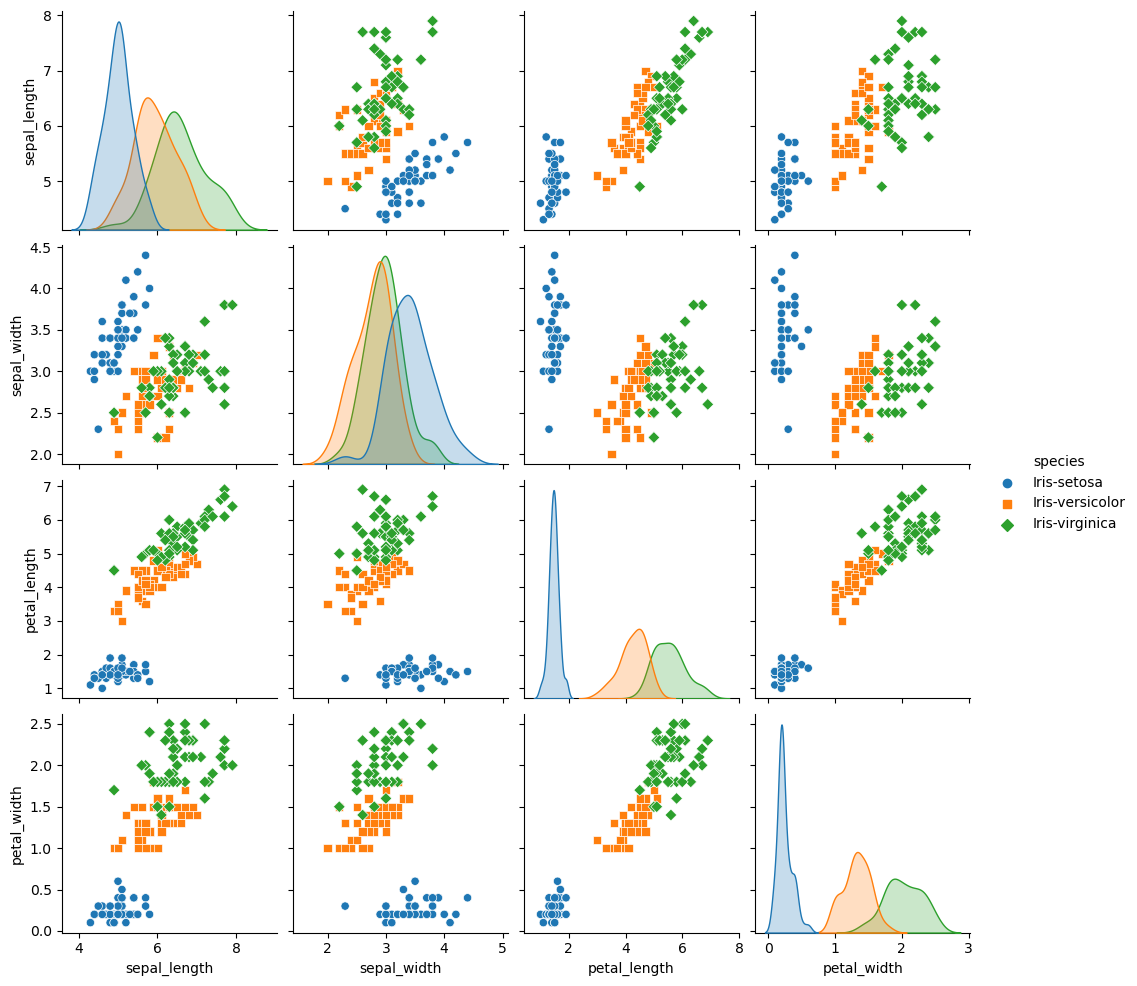

In [6]:
# Display pair plot to visualize relationships between features
sns.pairplot(dataset, hue='species', markers=["o", "s", "D"])

/tmp/ipykernel_20/1304408252.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dataset.corr(), annot=True, cmap='coolwarm', linewidths=.5)


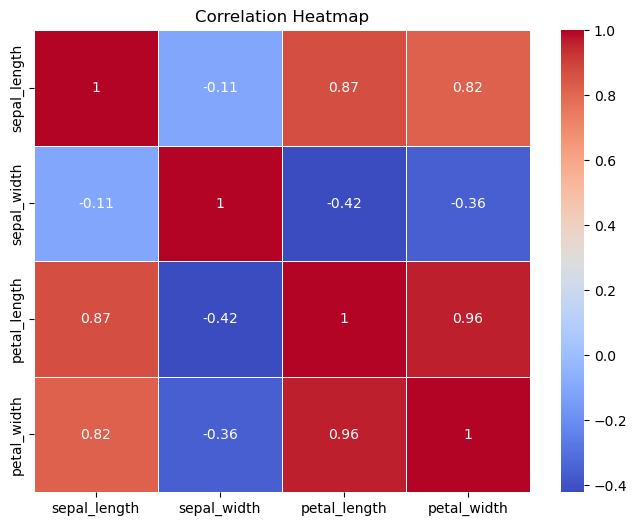

In [7]:
# Display correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(dataset.corr(), annot=True, cmap='coolwarm', linewidths=.5)
plt.title("Correlation Heatmap")
plt.show()

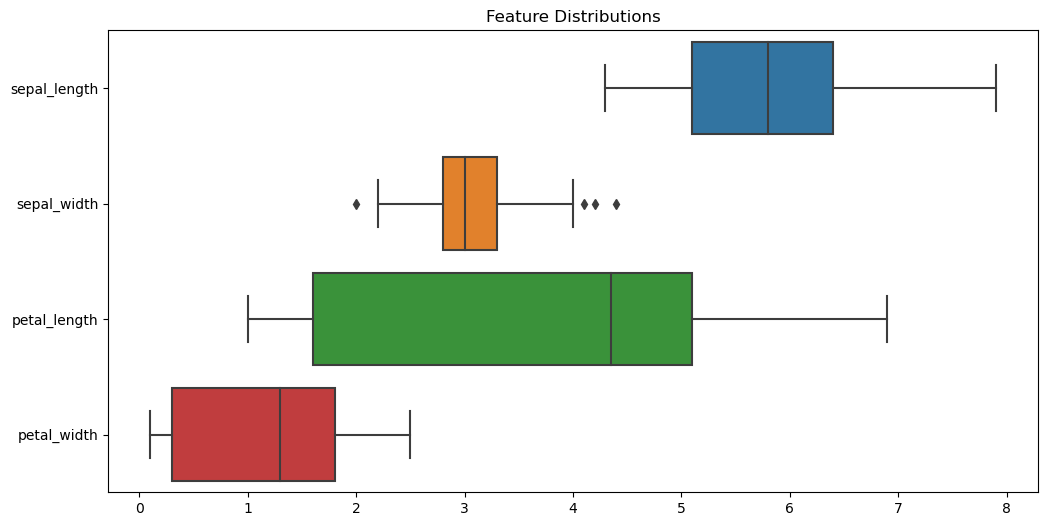

In [8]:
# Display box plots to visualize feature distributions
plt.figure(figsize=(12, 6))
sns.boxplot(data=dataset, orient='h')
plt.title("Feature Distributions")
plt.show()

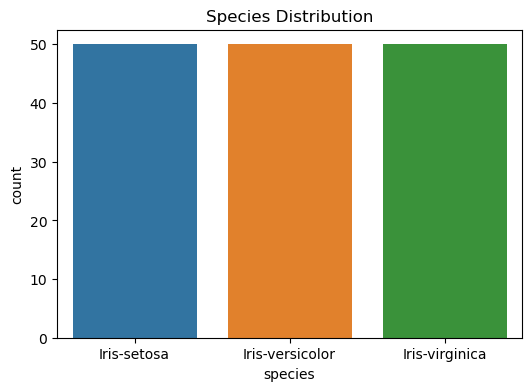

In [9]:
# Display count plot of species
plt.figure(figsize=(6, 4))
sns.countplot(data=dataset, x='species')
plt.title("Species Distribution")
plt.show()

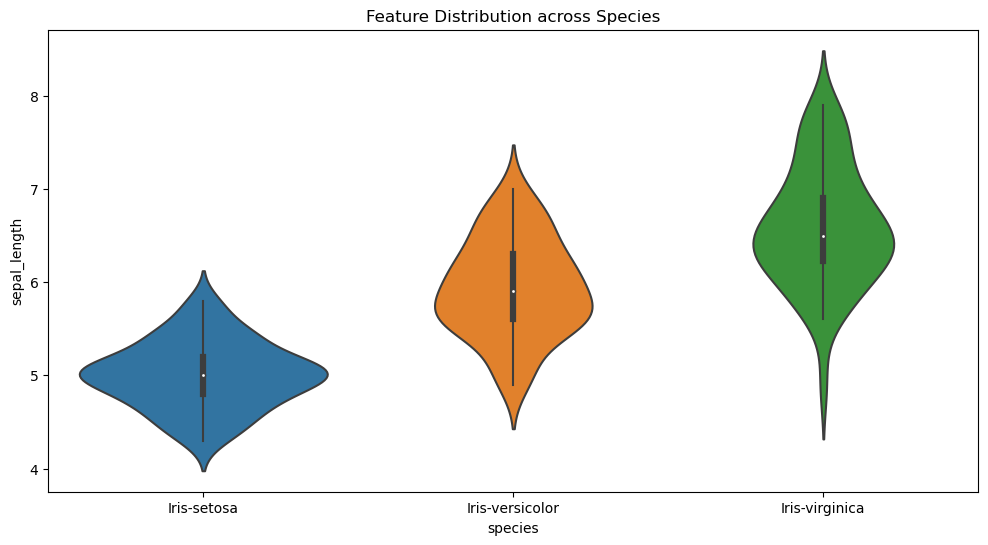

In [10]:
# Display violin plots to visualize feature distributions across species
plt.figure(figsize=(12, 6))
sns.violinplot(data=dataset, x='species', y='sepal_length')
plt.title("Feature Distribution across Species")
plt.show()

In [11]:
x = dataset[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]

In [12]:
le = LabelEncoder()

In [13]:
dataset['species']=le.fit_transform(dataset['species'])
dataset

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [14]:
y = dataset[['species']]

In [15]:
y

,species
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [16]:
from sklearn.linear_model import LogisticRegression

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
x_train,x_test,y_train,y_test=train_test_split( x, y, test_size=0.20, random_state=4)

In [19]:
model=LogisticRegression()

In [20]:
model.fit(x_train,y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [21]:
model.coef_

array([[-0.42885287,  0.91075274, -2.40018249, -1.0080628 ],
       [ 0.5595117 , -0.2760912 , -0.23342517, -0.90452847],
       [-0.13065883, -0.63466154,  2.63360767,  1.91259127]])

In [22]:
model.intercept_

array([  9.44406764,   1.97719614, -11.42126378])

In [23]:
y_pred=model.predict(x_test)
y_pred

array([2, 0, 2, 2, 2, 1, 2, 0, 0, 2, 0, 0, 0, 1, 2, 0, 1, 0, 0, 2, 0, 2,
       1, 0, 0, 0, 0, 0, 0, 2])

In [24]:
y_test

,species
128,2
18,0
130,2
105,2
107,2
78,1
83,1
14,0
5,0
133,2


In [25]:
#confusion matrix
from sklearn.metrics import confusion_matrix

In [26]:
confusion_matrix(y_test,y_pred)

array([[16,  0,  0],
       [ 0,  4,  1],
       [ 0,  0,  9]])

In [27]:
model.score(x_test,y_test)

0.9666666666666667